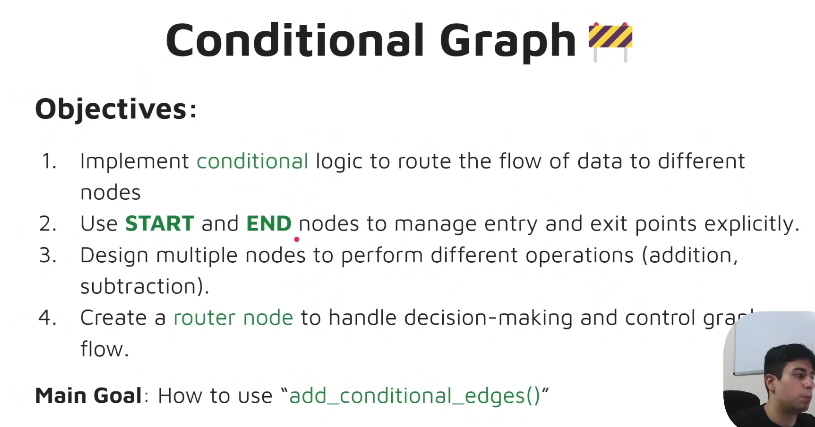

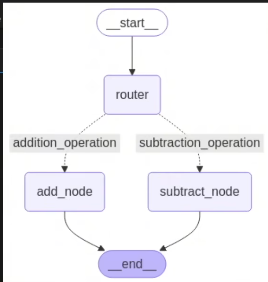

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [ ]:
def adder(state: AgentState) -> AgentState:
    """ This node adds 2 numbers """
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state:AgentState) -> AgentState:
    """ This node subtraacts 2 numbers """
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

Instead of state, we are returning the edges. For now, we gave edges names.

But by itself, it will not work. Because we are not returning a state, whilst other 2 functions expect a state to work



In [4]:
def decide_next_node(state:AgentState) -> AgentState:
    """  This node will select the next node of the graph"""
    if state["operation"] == "+":
        return "addition_operation"
    
    elif state["operation"] == "-":
        return "subtraction_operation"
    

The lambda on router node helps us pass the state.

add_conditional_edges(
    source - name of the node,
    action - function of that node,
    {path map}

)

In [5]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state) # passtrough function


graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,

    { 
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

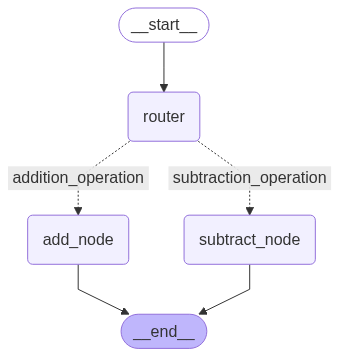

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
initial_state_1 = AgentState(number1 = 10, operation="-", number2=3)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 3, 'finalNumber': 7}
